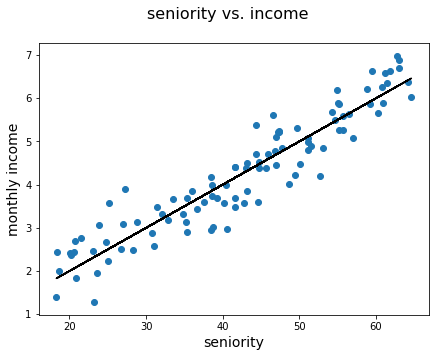

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

np.random.seed(1234)
# 100 values from uniform distribution between 18 and 65
sen = np.random.uniform(18, 65, 100)
# normal distribution based on uniform values divided by 10, std dev = 0.5
income = np.random.normal((sen/10), 0.5)
# reshape the np array. '-1' means infer the row number based on the column value -> 100
sen = sen.reshape(-1, 1)

fig = plt.figure(figsize=(7, 5))
fig.suptitle('seniority vs. income', fontsize=16)
plt.scatter(sen, income)
plt.plot(sen, sen/10, c='black')
plt.xlabel('seniority', fontsize=14)
plt.ylabel('monthly income', fontsize=14)
plt.show()

## **Using one hot encoding to transform categorical variables:**

In [31]:
# sample categorical variables called 'origin' with 3 values: 'USA', 'EU', 'ASIA'
origin = ['USA', 'EU', 'EU', 'ASIA','USA', 'EU', 'EU', 'ASIA', 'ASIA', 'USA']
origin_series = pd.Series(origin)

# Change to 'category' type:
origin_cat =  origin_series.astype('category')
origin_cat # now, type = category

0     USA
1      EU
2      EU
3    ASIA
4     USA
5      EU
6      EU
7    ASIA
8    ASIA
9     USA
dtype: category
Categories (3, object): [ASIA, EU, USA]

**Label Encoding** (Representing categories as numbers)

In [32]:
# Use '.cat.codes'
origin_cat.cat.codes

0    2
1    1
2    1
3    0
4    2
5    1
6    1
7    0
8    0
9    2
dtype: int8

Can also use sklearn's LabelEncoder:

In [33]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

origin_encoded = lb_make.fit_transform(origin_cat)
origin_encoded

array([2, 1, 1, 0, 2, 1, 1, 0, 0, 2])

**While .cat.codes has to be used on a 'category' dtype, sklearn.LabelEncoder does not.**

### Making each subcategory its own variable of 0s and 1s:

Method 1:

In [34]:
pd.get_dummies(origin_cat)

,ASIA,EU,USA
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1
5,0,1,0
6,0,1,0
7,1,0,0
8,1,0,0
9,0,0,1


Method 2: LabelBinarizer

In [36]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
# Output is currently an array
origin_dummies = lb.fit_transform(origin_cat)

# You need to convert this back to a dataframe
origin_dum_df = pd.DataFrame(origin_dummies,columns=lb.classes_)
origin_dum_df

,ASIA,EU,USA
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1
5,0,1,0
6,0,1,0
7,1,0,0
8,1,0,0
9,0,0,1


### The Dummy Variable Trap

Making each subgroup withing a categorical variable its own variable will introduce **multicollinearity**
 - perfectly predicting one variable using some combination of other variables. Variables that are closely correlated with one another. (i.e. You can predict 'USA' from the absence of 'ASIA' and 'EU')

In [39]:
# A solution is to drop one of the variables above from the dataset
pd.get_dummies(origin_cat, drop_first=True)

,EU,USA
0,0,1
1,1,0
2,1,0
3,0,0
4,0,1
5,1,0
6,1,0
7,0,0
8,0,0
9,0,1


You'll soon see that dropping the first variable affects the interpretation of regression coefficients. The dropped category becomes what is known as the **reference category**. The regression coefficients that result from fitting the remaining variables represent the change *relative* to the reference.

You'll also see that in certain contexts, multicollinearity and the dummy variable trap are less of an issue and can be ignored. It is therefore important to understand which models are sensitive to multicollinearity and which are not.

### Steps for creating one hot encoded dummy variables and reformatting the OG DataFrame

In [40]:
# Creating dataframe of dummy variables, dropping the first category of each
cyl_dummies = pd.get_dummies(data['cylinders'], prefix='cyl', drop_first=True)
yr_dummies = pd.get_dummies(data['model year'], prefix='yr', drop_first=True)
orig_dummies = pd.get_dummies(data['origin'], prefix='orig', drop_first=True)

NameError: name 'data' is not defined

In [ ]:
# Dropping the original categorical variables from the dataframe
data = data.drop(['cylinders','model year','origin'], axis=1)

In [ ]:
# Concatenating the dummy DFs to the OG dataset
data = pd.concat([data, cyl_dummies, yr_dummies, orig_dummies], axis=1)